# Demonstration of some Pandas capabilities using a famous concrete dataset

First, we are going to import some necessary libraries and to load the famous concrete dataset published by Yeh et al.
To save typing, we have created a tinyurl `tunyurl.com/icccm1` which contains a link to a `xls` file containing the dataset.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tgaedt/workshop_uv/blob/main/notebooks/1_pandas_demo.ipynb)



In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://tinyurl.com/icccm1"
df = pd.read_excel(url) 

df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


We note that the column names are very long and contain some special characers. Therefore, we will manually rename the columns.

In [131]:
df.columns = ["cement", "bfs", "flyash", "water", "sp", "agg_coarse", "agg_fine", "age", "strength"]
df.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [132]:
# get the length of the dataframe
df_length = len(df)
df_length

1030

## Different ways to select a column in Pandas
We now demonstrate how to select a column with Pandas. Note that the type of a column is a Pandas Series.

In [133]:
type(df.cement)

pandas.core.series.Series

A specific column, here the column containing the amount of cement can be selected using a dot notation like this:

In [134]:
df.cement.head(4)

0    540.0
1    540.0
2    332.5
3    332.5
Name: cement, dtype: float64

Alternatively a notation with square brackets is also possible:

In [135]:
df["cement"].head(4)

0    540.0
1    540.0
2    332.5
3    332.5
Name: cement, dtype: float64

It is also possible to use in indexed location based access. The `:` means that all rows are selected.

In [136]:
df.iloc[:,0].head(4)

0    540.0
1    540.0
2    332.5
3    332.5
Name: cement, dtype: float64

A name based selection is also possible

In [137]:
col4 = df.loc[:,"cement"]

## Create a new column - calculate the w/c value

A new column can be created with a simple assignment like `df["new_col_name"]`. 
Alternatively the methods `assign()` or `insert()` can be used.

In [138]:
df["wc"] = df["water"] / (df["cement"] + df["bfs"] + df["flyash"])
df.head(4)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.48


A column can be deleted with the method `drop()`, using the parameter `inplace = True` enables to leave out the assignment `df = df.drop()`.

In [139]:
df.drop(columns=["wc"], inplace=True)
df.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


Next, we show the assign and insert methods.

In [140]:
df = df.assign(wc = df["water"] / (df["cement"] + df["bfs"] + df["flyash"]))
df.head(3)

,cement,bfs,flyash,water,sp,agg_coarse,agg_fine,age,strength,wc
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.30
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.30
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.48


In [141]:
# delete the column again
df.drop(columns=["wc"], inplace=True)

# the insert method allows to specify the column index
df.insert(4, "wc", df["water"] / (df["cement"] + df["bfs"] + df["flyash"]))
df.iloc[2:5]

,cement,bfs,flyash,water,wc,sp,agg_coarse,agg_fine,age,strength
2,332.5,142.5,0.0,228.0,0.48000,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.48000,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.58006,0.0,978.4,825.5,360,44.296075


It is probably a good idea to round the water-to-cement ratio after two decimal positions.

In [142]:
# better to round off after the second decimal
df["wc"] = df["wc"].round(2)
df.iloc[2:5]

,cement,bfs,flyash,water,wc,sp,agg_coarse,agg_fine,age,strength
2,332.5,142.5,0.0,228.0,0.48,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.48,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.58,0.0,978.4,825.5,360,44.296075


## Data types
Currently, the dataframe only has float and int as datatypes.

In [143]:
df.dtypes

cement        float64
bfs           float64
flyash        float64
water         float64
wc            float64
sp            float64
agg_coarse    float64
agg_fine      float64
age             int64
strength      float64
dtype: object

We are now going to create a new column which contains entries of type `boolean`. Therefore, we are going to chose an arbitrary criterium to check. Here, we are going to evaluate whether the w/c value is higher than 0.42. We will name the column `wc_high`. 

In [144]:
df.insert(5, "wc_high", df["wc"] > 0.42)
df.head(4)

,cement,bfs,flyash,water,wc,wc_high,sp,agg_coarse,agg_fine,age,strength
0,540.0,0.0,0.0,162.0,0.30,False,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,0.30,False,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,365,41.052780


In [145]:
# check dtypes
df.dtypes

cement        float64
bfs           float64
flyash        float64
water         float64
wc            float64
wc_high          bool
sp            float64
agg_coarse    float64
agg_fine      float64
age             int64
strength      float64
dtype: object

## Calculating overview metrics of the dataset
Because `True` will evaluate to 1, we can easily count the number of concretes with a w/c ratio of larger than 0.42. 

In [146]:
# count high wc instances
nr_high = df.wc_high.sum()

nr_high

np.int64(602)

Of course, this can be also summarized in one line for quick counting. No need to create a new column. Let's count the concretes with more than 100 kg of slag in the mix design.

In [147]:
(df["bfs"] > 100).sum()

np.int64(390)

It is also easy and straightforward to obtrain the mean values of all columns.

In [148]:
df.mean(numeric_only=True)

cement        281.165631
bfs            73.895485
flyash         54.187136
water         181.566359
wc              0.469233
wc_high         0.584466
sp              6.203112
agg_coarse    972.918592
agg_fine      773.578883
age            45.662136
strength       35.817836
dtype: float64

Pandas has a nice method (`desribe()`) for getting a quick overview about the data properties in the dataframe. 

In [149]:
df.describe()

,cement,bfs,flyash,water,wc,sp,agg_coarse,agg_fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,0.469233,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,0.126932,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.240000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.380000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,0.470000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,0.560000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,0.900000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Filtering a dataset
Very often, you need to filter a dataframe by one or more criteria. This can be achieved in differnt ways. 

In [150]:
# filter operations
df_high = df.query("wc_high > 0.42")
df_high.head(3)


,cement,bfs,flyash,water,wc,wc_high,sp,agg_coarse,agg_fine,age,strength
2,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.58,True,0.0,978.4,825.5,360,44.296075


One thing we has irritated me many, many times is the concept of a **view** in Pandas. The `df.query("wc_high > 0.42")` method does not necessarily creates a filtered copy of the original dataframe, i.e. a **new**, independent dataframe to the variable `df_high`. You can get a `SettingWithCopyWarning`. For details see https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [151]:
df_high["new_var"] = 5 

/tmp/ipykernel_58132/2600905272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high["new_var"] = 5


The warning can be avoided by calling the `copy()` method.

In [152]:
df_high = df.query("wc_high > 0.42").copy()
df_high["new_var"] = 5

Another method to filter dataframes is to create a filter mask.

In [153]:
mask = (df["wc"] > 0.48) & (df["bfs"] < 50)
mask.sum()

np.int64(323)

Now the mask can be applied to a dataframe to create a filtered dataframe.

In [154]:
df_filtered = df[mask]

## Joining datasets
Often, two datasets need to be joined. To do a join operation, a common key is necessary for both dataframes. We can not go into details here but would like to illustrate this point using simple, artifical example. 

First, we need to create a key in the existing concrete dataset. In our case, suitable keys are often the names or codes of the individual experiment. Here, we will create a new column with strings `concrete_mix_1` etc. To create this list, we will use the index values of the original dataframe as numbers. 
Note that every dataframe object in pandas has an index. In the current case the index is just a list of numbers called `RangeIndex`.

In [155]:
df.index

RangeIndex(start=0, stop=1030, step=1)

We can loop through the index and get the inidividual numbers.

In [156]:
for number in df.index[:6]:
    print(number)

0
1
2
3
4
5


A more concise way to do this in Python is the use of a list comprehension.

In [157]:
[number for number in df.index[:6]]

[0, 1, 2, 3, 4, 5]

We can now combine a list comprehension which loops through all values in the index with a string **concrete_mix_**. Note that we need to transform the number from the index into a string object, i.e., we need to use `str(i)`.

In [158]:
exp_names = ["concrete_mix_" + str(i) for i in df.index.values]
df["exp_code"] = exp_names
df.head(3)

,cement,bfs,flyash,water,wc,wc_high,sp,agg_coarse,agg_fine,age,strength,exp_code
0,540.0,0.0,0.0,162.0,0.30,False,2.5,1040.0,676.0,28,79.986111,concrete_mix_0
1,540.0,0.0,0.0,162.0,0.30,False,2.5,1055.0,676.0,28,61.887366,concrete_mix_1
2,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,270,40.269535,concrete_mix_2


We will now create a second dataframe which also contains a column with the strings **concrete_mix_** and some random values in a second column.

In [159]:
additional_data = np.random.randint(0, 300, len(df)) 
df2 = pd.DataFrame({"exp_code":exp_names, "new_parameter": additional_data})

df2.head(3)

,exp_code,new_parameter
0,concrete_mix_0,96
1,concrete_mix_1,97
2,concrete_mix_2,14


Now the two dataframes `df` and `df2` can easily be joined.

In [160]:
# join by index
df_joined = pd.merge(df, df2, on="exp_code")

df_joined.head(3)

,cement,bfs,flyash,water,wc,wc_high,sp,agg_coarse,agg_fine,age,strength,exp_code,new_parameter
0,540.0,0.0,0.0,162.0,0.30,False,2.5,1040.0,676.0,28,79.986111,concrete_mix_0,96
1,540.0,0.0,0.0,162.0,0.30,False,2.5,1055.0,676.0,28,61.887366,concrete_mix_1,97
2,332.5,142.5,0.0,228.0,0.48,True,0.0,932.0,594.0,270,40.269535,concrete_mix_2,14


## Visualization and exploratory data analysis
The exploratory data analysis of a dataset is very important in understanding the relations between the parameters (i.e., the columns). For the concrete dataset we have 1030 compressive strength tests. We already know that the compressive strength of a concrete depends on the w/c value, the curing duration, and the cement content. 

We begin by exploring the relation between w/c ratio and strength.

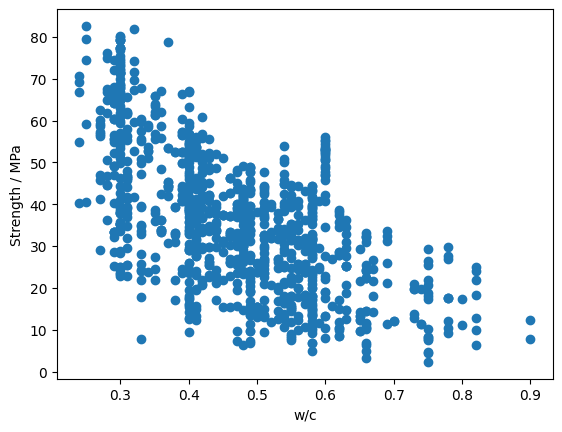

In [161]:
fig, ax = plt.subplots()
ax.scatter(df["wc"], df["strength"])
ax.set_xlabel("w/c")
ax.set_ylabel("Strength / MPa")
plt.show()

There is a clear downward trend in the data with increasing w/c values. The most important parameter to take into account now is the curing age of the concrete. We will filter the dataset to include 3, 7, and 28 days.

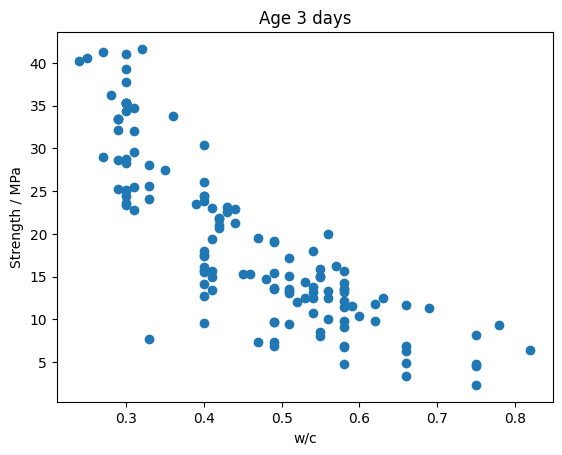

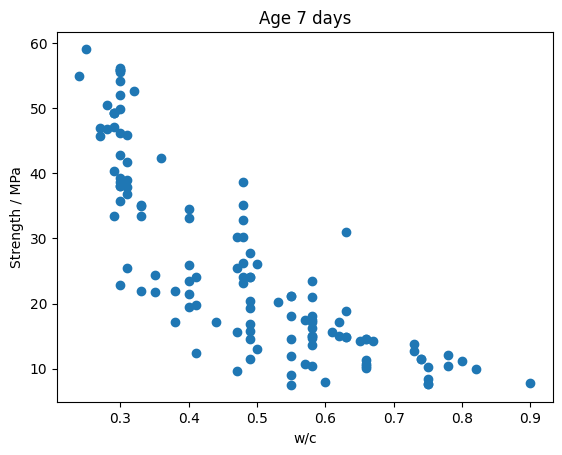

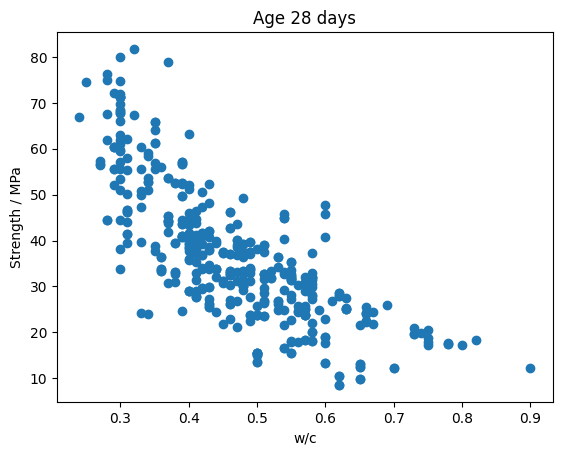

In [162]:
for name, group in df.query("age in [3, 7, 28]").groupby("age"):
    fig, ax = plt.subplots()
    ax.scatter(group["wc"], group["strength"])
    ax.set_title(f"Age {name} days")
    ax.set_xlabel("w/c")
    ax.set_ylabel("Strength / MPa")
    plt.show()
    


## Subplots
It would be nice to create a diagram with subplots so that the differences are far more easy to distinguish. This can be done in matplotlib using subplots. Here we are creating 1 row and 3 columns of subplots.

Next we need to loop through the filtered and grouped data and simultaneously through the list containing the axes objects for the individual subplots. This can be achieved with the `zip` command in python. Because the `groupby` method returns two objects, we need to use brackets with the declaration of the loop. The parameter `observed = True` is necessary to suppress a deprecation warning. Feel free to ignore this at the moment.

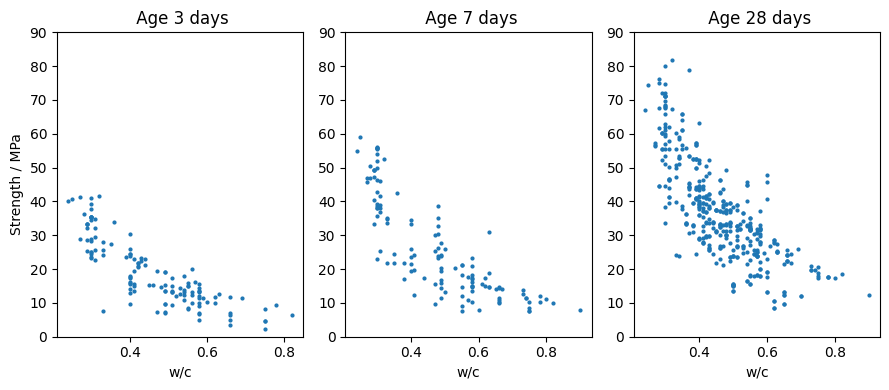

In [163]:
fig, axs = plt.subplots(1,3, layout="tight", figsize=(9,4))

for (name, group), ax in zip(df.query("age in [3, 7, 28]").groupby("age", observed=True), axs.flatten()):
    ax.scatter(group["wc"], group["strength"], s=4)
    ax.set_title(f" Age {name} days")
    ax.set_xlabel("w/c")
    ax.set_ylim(0,90)
axs[0].set_ylabel("Strength / MPa")
plt.show()


## Fast and simple correlation matrix using seaborn

First, we will show how to get all correlation coefficents between the columns quickly.

In [164]:
correlation_matrix = df.select_dtypes(include=["number"]).corr()

Next, we will leverage a plotting library which builds on matplotlib and makes some plotting objectives much easier to achieve.

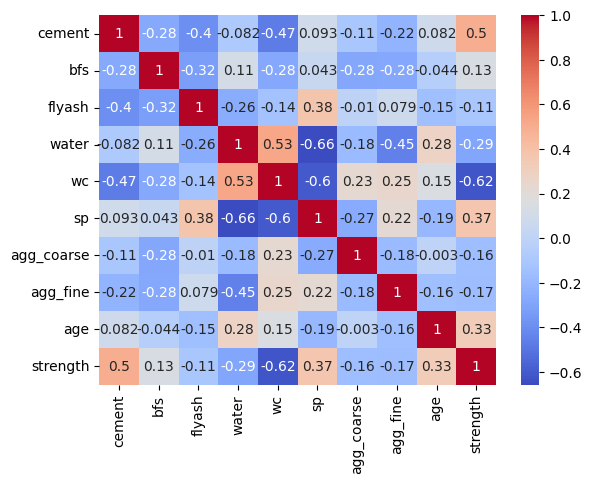

In [165]:

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Fitting the data (grouped)

One way to illustrate the true usefulness of Python is to demonstrate how easy it is to fit the data in a grouped fashion. We are going to use the method `curve_fit` from scipy to do this.

First, we define an exponential function `exponential`

$$
\sigma_c = c + a \cdot \exp(-b\cdot w/c)
$$

As we want to group our dataset by the age and then apply a fit function, we define `fit_exponential` which returns both the fit parameters and the R2 value for the quality of the fit. 

In [166]:

from scipy.optimize import curve_fit

# define function to fit
def exponential(x, a, b):
    return a * np.exp(-b*x)

# define function which returns the best fit parameters as a pandas Series
def fit_exponential(df, xcol="wc", ycol="strength"):
    f = exponential
    popt, pcov = curve_fit(f, df[xcol], df[ycol], maxfev=10000)
    
    # Calculate R-squared
    y_actual = df[ycol]
    y_predicted = f(df[xcol], *popt)
    ss_res = np.sum((y_actual - y_predicted) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    out = {"a": popt[0], "b": popt[1], "r_squared": r_squared}
    return pd.Series(out)

fits = df.query("age in [3, 7, 28]").groupby("age").apply(lambda t: fit_exponential(t), include_groups=False)

fits

,a,b,r_squared
age,,,
3,97.253149,3.829030,0.767572
7,125.686869,3.612047,0.759078
28,140.941816,3.030842,0.647874


## Plot the fitted curves and the raw data
It is very important to check the quality of the fits. We are going to plot the fits together with the fitted raw data. 

[]

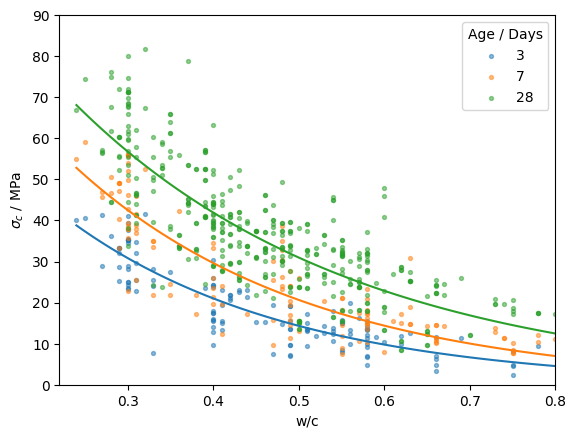

In [167]:
x = np.linspace(df.wc.min(), df.wc.max(),100)

fig, ax = plt.subplots()
for index, row in fits.iterrows():
    y = exponential(x, row["a"], row["b"])
    ax.plot(x,y)
for name, group in df.query("age in [3,7,28] ").groupby("age"):
    ax.scatter(group["wc"], group["strength"], s=8, alpha =0.5, label=name)
ax.set_xlim(0.22, 0.8)
ax.set_ylim(0, 90)
ax.set_xlabel("w/c")
ax.set_ylabel("$\sigma_c$ / MPa")
plt.legend(title="Age / Days")
plt.plot()